In [2]:
import pandas as pd

In [4]:
amazon_sales_data = pd.read_csv("C:\\Users\\Jerome alphonse\\Downloads\\Amazon Sales data.csv")

In [15]:
amazon_sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [14]:

print(amazon_sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


In [16]:
# Convert 'Order Date' to datetime with the correct format
amazon_sales_data['Order Date'] = pd.to_datetime(amazon_sales_data['Order Date'], format='%m/%d/%Y')

# Extract year and month from 'Order Date'
amazon_sales_data['Year'] = amazon_sales_data['Order Date'].dt.year
amazon_sales_data['Month'] = amazon_sales_data['Order Date'].dt.month

# Handle missing values if any
amazon_sales_data.dropna(inplace=True)

# Display the transformed data
print(amazon_sales_data.head())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933  6/27/2010        9925   
1        Online              C 2012-08-22  963881480  9/15/2012        2804   
2       Offline              L 2014-05-02  341417157   5/8/2014        1779   
3        Online              C 2014-06-20  514321792   7/5/2014        8102   
4       Offline              L 2013-02-01  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

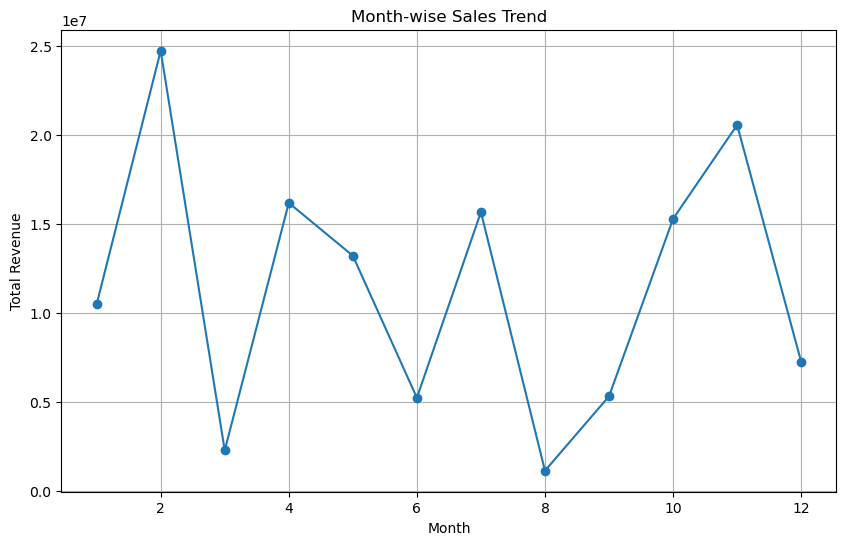

In [20]:
# Month-wise sales trend
month_wise_sales = amazon_sales_data.groupby('Month')['Total Revenue'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(month_wise_sales['Month'], month_wise_sales['Total Revenue'], marker='o')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


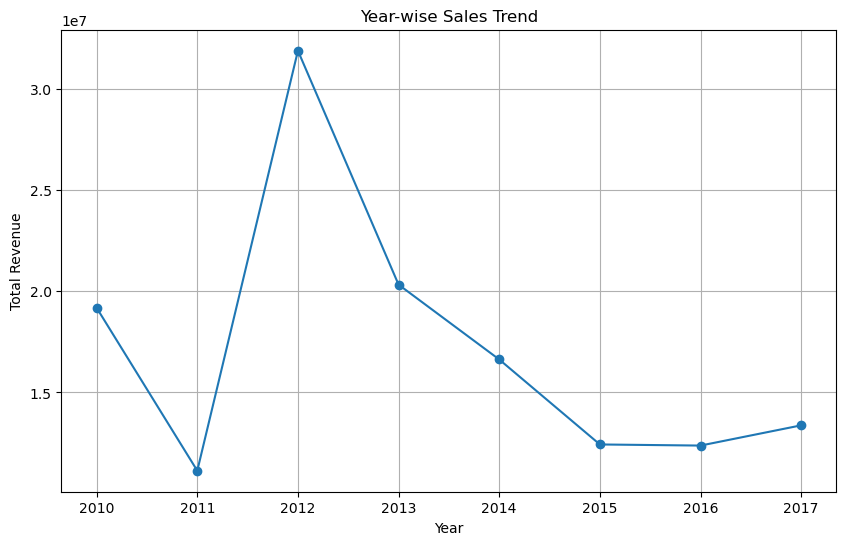

In [21]:
# Year-wise sales trend
year_wise_sales = amazon_sales_data.groupby('Year')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(year_wise_sales['Year'], year_wise_sales['Total Revenue'], marker='o')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


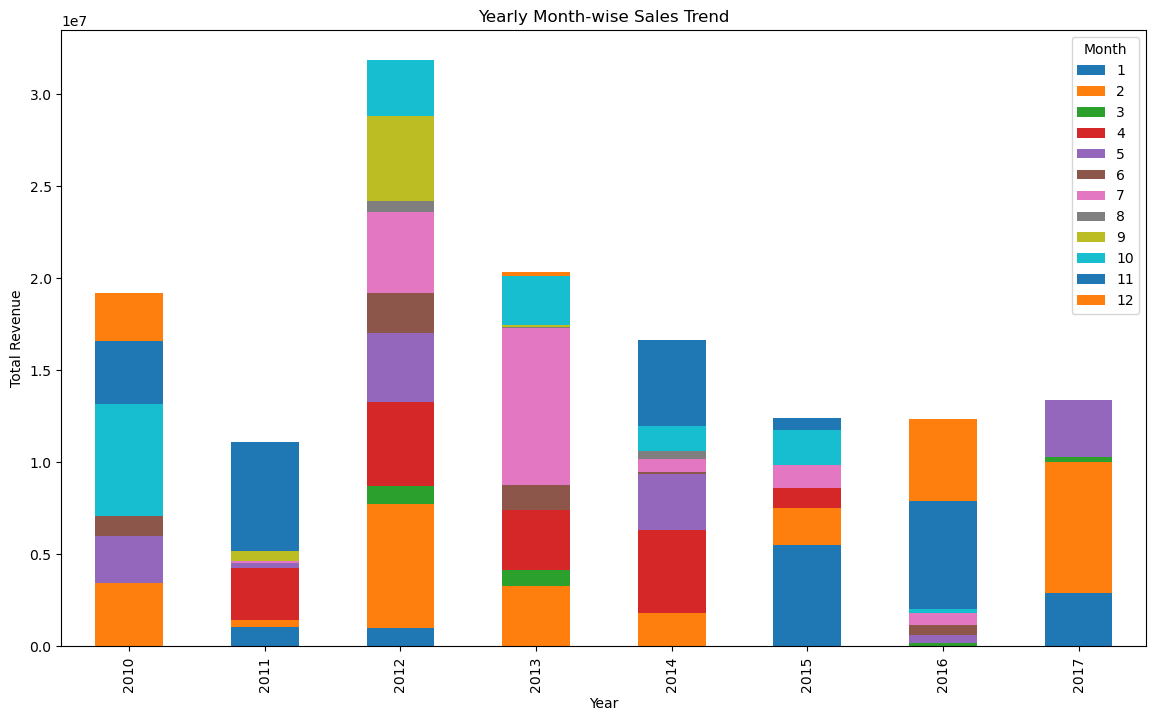

In [22]:
# Yearly Month-wise sales trend
year_month_wise_sales = amazon_sales_data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()

year_month_wise_sales.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Month')
plt.show()


In [23]:
# Key metrics
total_revenue = amazon_sales_data['Total Revenue'].sum()
average_revenue = amazon_sales_data['Total Revenue'].mean()
total_units_sold = amazon_sales_data['Units Sold'].sum()
average_units_sold = amazon_sales_data['Units Sold'].mean()

print(f"Total Revenue: {total_revenue}")
print(f"Average Revenue: {average_revenue}")
print(f"Total Units Sold: {total_units_sold}")
print(f"Average Units Sold: {average_units_sold}")


Total Revenue: 137348768.31
Average Revenue: 1373487.6831
Total Units Sold: 512871
Average Units Sold: 5128.71


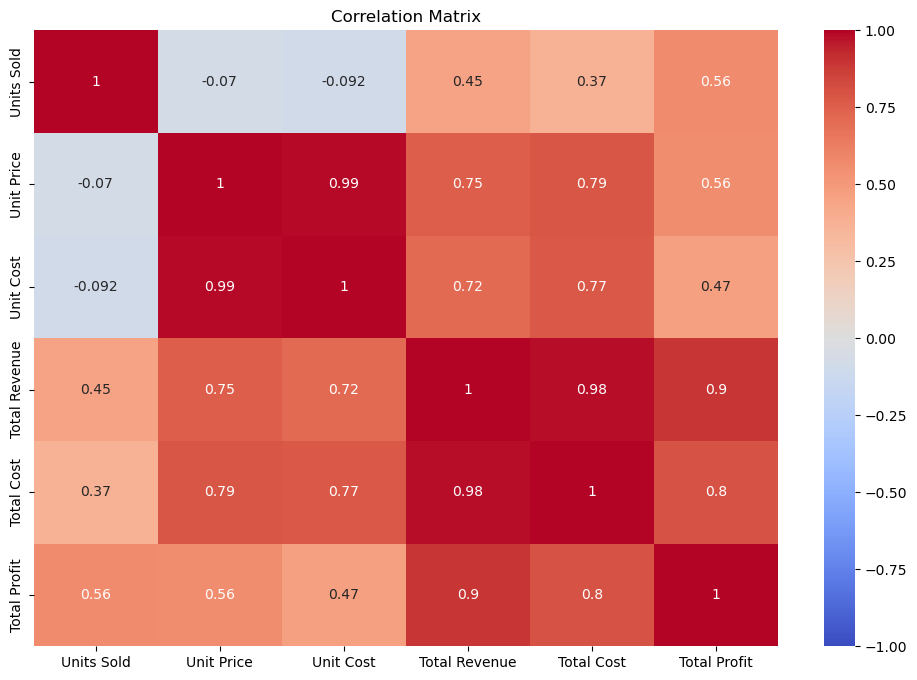

In [25]:
# Correlation matrix to find relationships between numerical attributes
correlation_matrix = amazon_sales_data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()


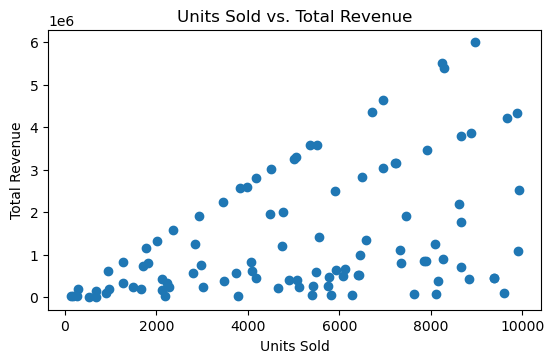

In [26]:
# Scatter plots to visualize relationships
plt.figure(figsize=(14, 8))

# Units Sold vs. Total Revenue
plt.subplot(2, 2, 1)
plt.scatter(amazon_sales_data['Units Sold'], amazon_sales_data['Total Revenue'])
plt.title('Units Sold vs. Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()


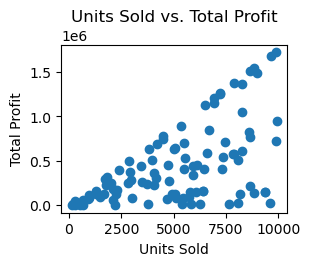

In [27]:
# Units Sold vs. Total Profit
plt.subplot(2, 2, 2)
plt.scatter(amazon_sales_data['Units Sold'], amazon_sales_data['Total Profit'])
plt.title('Units Sold vs. Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.show()

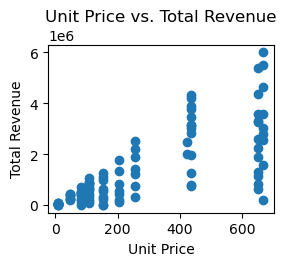

In [28]:

# Unit Price vs. Total Revenue
plt.subplot(2, 2, 3)
plt.scatter(amazon_sales_data['Unit Price'], amazon_sales_data['Total Revenue'])
plt.title('Unit Price vs. Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.show()

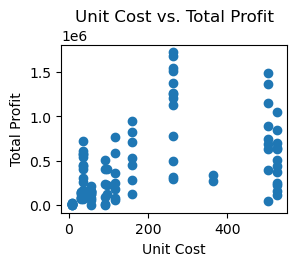

In [30]:
# Unit Cost vs. Total Profit
plt.subplot(2, 2, 4)
plt.scatter(amazon_sales_data['Unit Cost'], amazon_sales_data['Total Profit'])
plt.title('Unit Cost vs. Total Profit')
plt.xlabel('Unit Cost')
plt.ylabel('Total Profit')
plt.show()


In [31]:
# Detailed key metrics
total_profit = amazon_sales_data['Total Profit'].sum()
average_profit = amazon_sales_data['Total Profit'].mean()
profit_margin = (total_profit / total_revenue) * 100  # Profit margin as a percentage

print(f"Total Profit: {total_profit}")
print(f"Average Profit: {average_profit}")
print(f"Profit Margin: {profit_margin:.2f}%")


Total Profit: 44168198.39999999
Average Profit: 441681.98399999994
Profit Margin: 32.16%


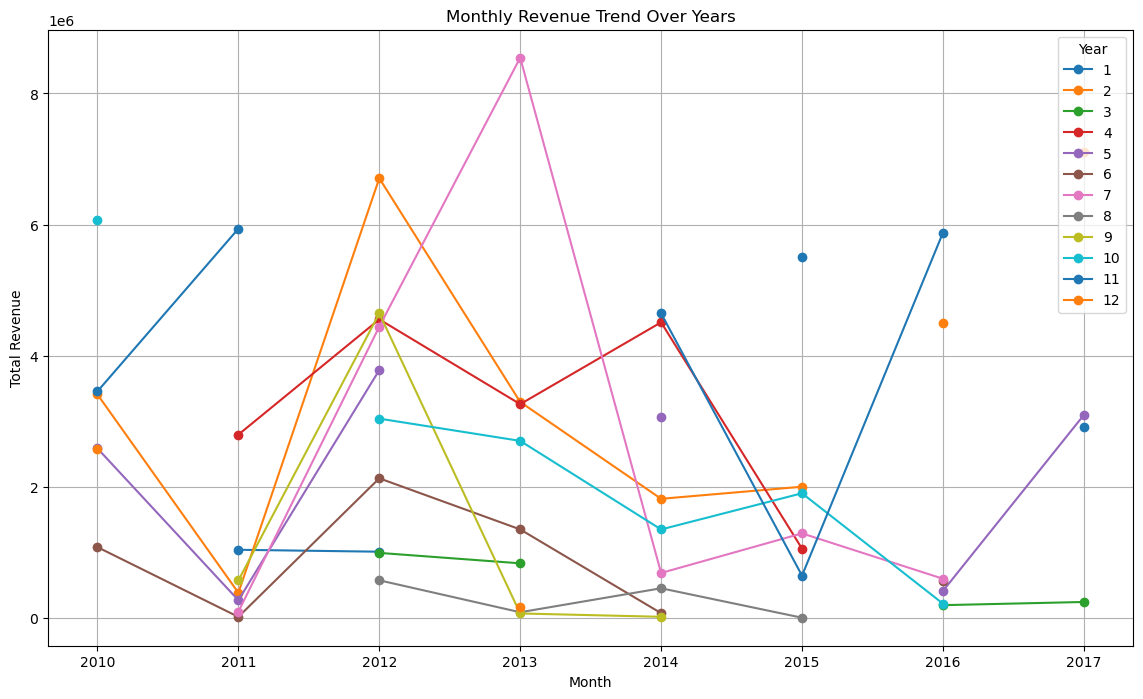

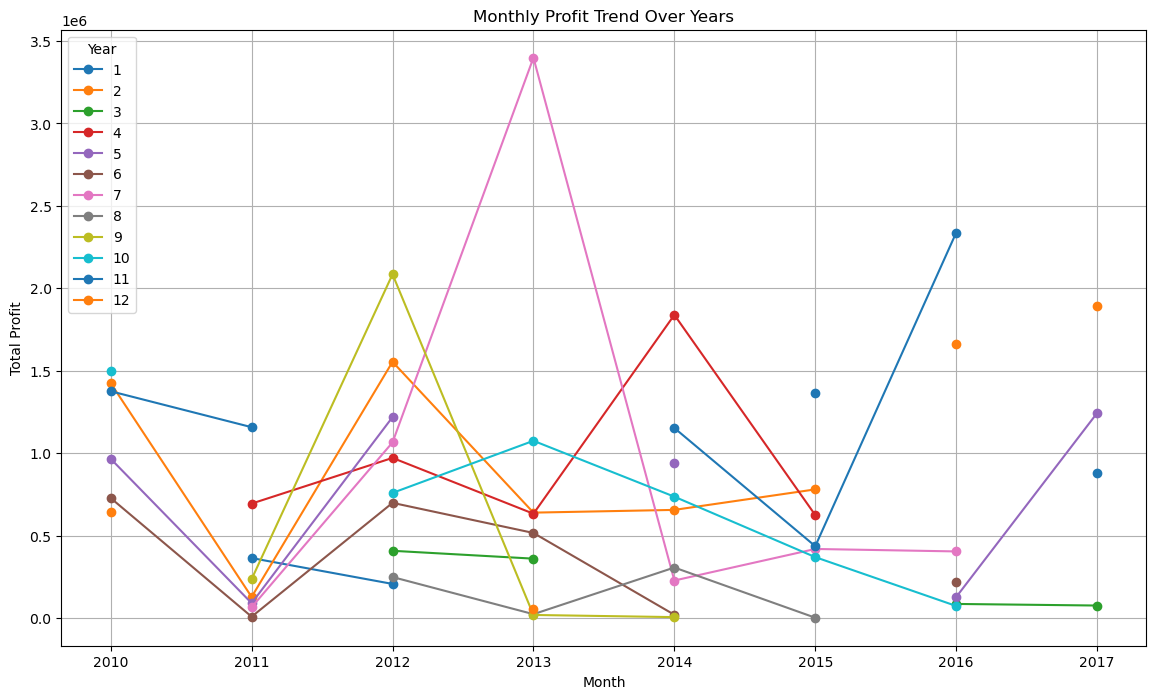

In [32]:
# Monthly revenue trend over different years
monthly_revenue = amazon_sales_data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()

monthly_revenue.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Monthly Revenue Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Monthly profit trend over different years
monthly_profit = amazon_sales_data.groupby(['Year', 'Month'])['Total Profit'].sum().unstack()

monthly_profit.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Monthly Profit Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Year')
plt.grid(True)
plt.show()


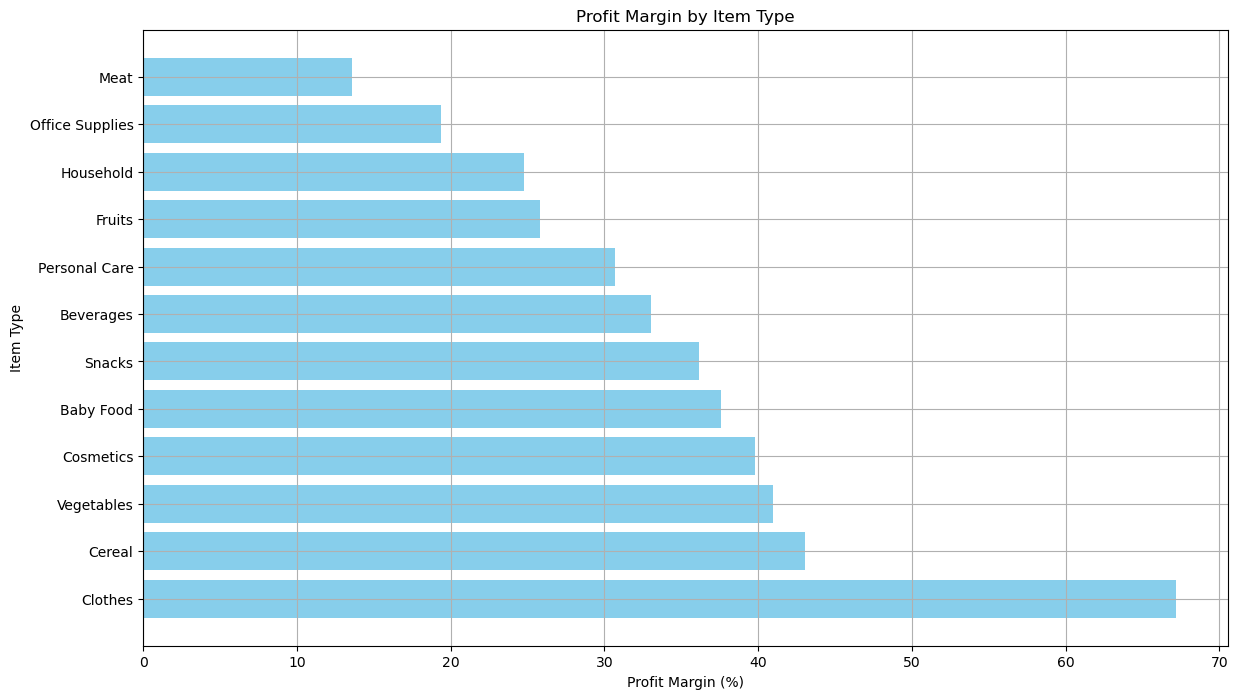

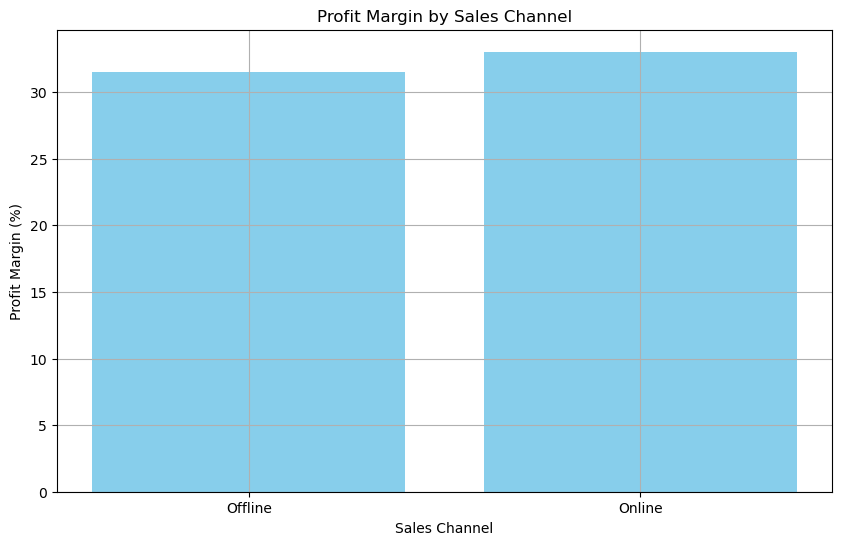

In [33]:
# Profit margin by item type
item_type_profit_margin = amazon_sales_data.groupby('Item Type').apply(lambda x: (x['Total Profit'].sum() / x['Total Revenue'].sum()) * 100).reset_index()
item_type_profit_margin.columns = ['Item Type', 'Profit Margin']

item_type_profit_margin.sort_values(by='Profit Margin', ascending=False, inplace=True)

plt.figure(figsize=(14, 8))
plt.barh(item_type_profit_margin['Item Type'], item_type_profit_margin['Profit Margin'], color='skyblue')
plt.title('Profit Margin by Item Type')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Item Type')
plt.grid(True)
plt.show()

# Profit margin by sales channel
sales_channel_profit_margin = amazon_sales_data.groupby('Sales Channel').apply(lambda x: (x['Total Profit'].sum() / x['Total Revenue'].sum()) * 100).reset_index()
sales_channel_profit_margin.columns = ['Sales Channel', 'Profit Margin']

plt.figure(figsize=(10, 6))
plt.bar(sales_channel_profit_margin['Sales Channel'], sales_channel_profit_margin['Profit Margin'], color='skyblue')
plt.title('Profit Margin by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Profit Margin (%)')
plt.grid(True)
plt.show()


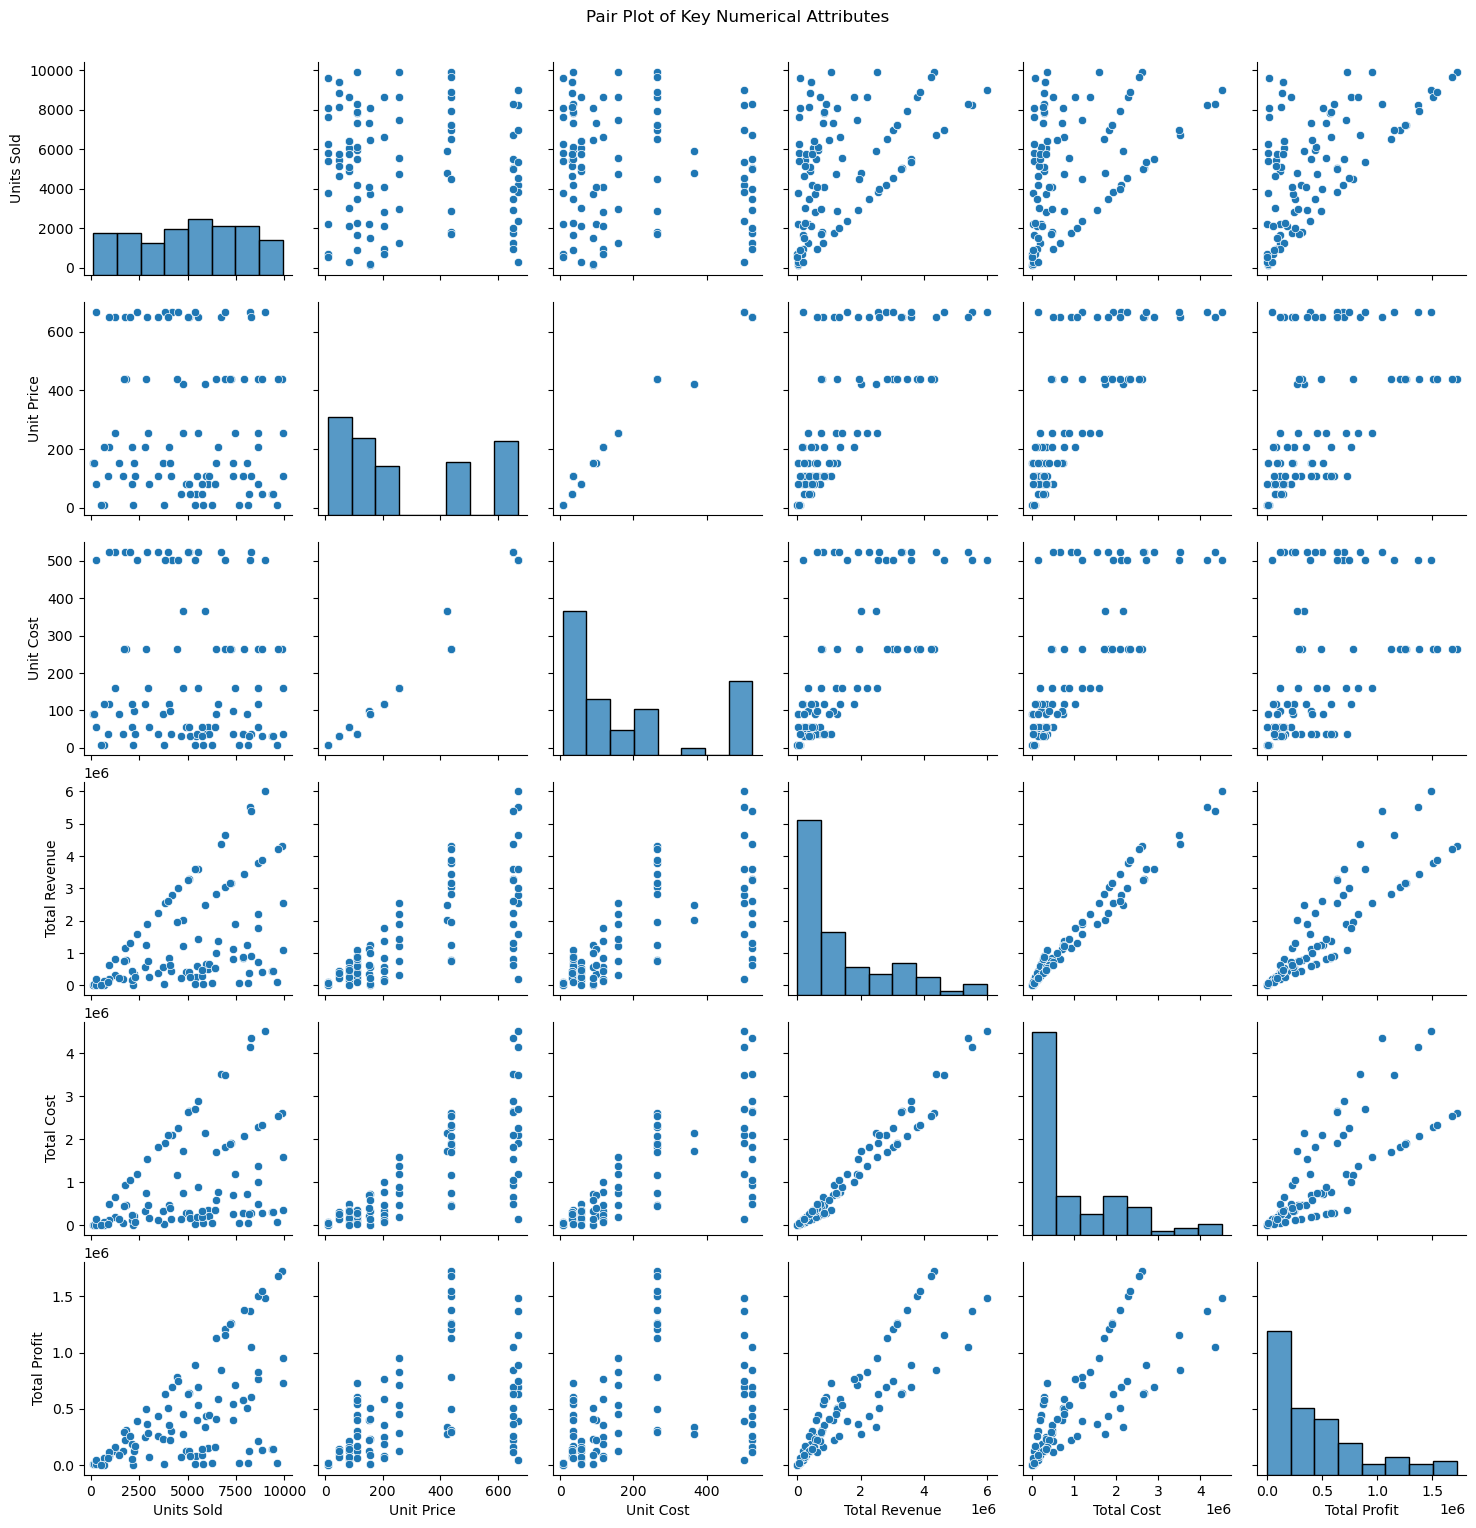

In [35]:
# Pair plot to visualize relationships between numerical attributes
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(amazon_sales_data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']])
plt.suptitle('Pair Plot of Key Numerical Attributes', y=1.02)
plt.show()

